In [1]:
symbol='AAPL'
url = 'https://finance.yahoo.com/quote/{}/history?p={}'.format(symbol,symbol)

In [2]:
from bs4 import BeautifulSoup
from requests_html import HTMLSession
import pandas as pd

In [3]:
session = HTMLSession()
r = session.get(url)

In [4]:
rows = r.html.xpath('//*[@data-test="historical-prices"]/tbody/tr')
data =[]
for row in rows:
    if len(row.xpath('.//td')) < 7:
        continue
    data.append({
        'Symbol':symbol,
        'Date':row.xpath('.//td[1]/span/text()')[0],
        'Open':row.xpath('.//td[2]/span/text()')[0],
        'High':row.xpath('.//td[3]/span/text()')[0],
        'Low':row.xpath('.//td[4]/span/text()')[0],
        'Close':row.xpath('.//td[5]/span/text()')[0],
        'Adj Close':row.xpath('.//td[6]/span/text()')[0],
        'Volume':row.xpath('.//td[7]/span/text()')[0]
    })

In [5]:
data

[{'Symbol': 'AAPL',
  'Date': 'Feb 09, 2022',
  'Open': '176.05',
  'High': '176.65',
  'Low': '174.90',
  'Close': '176.28',
  'Adj Close': '176.28',
  'Volume': '70,195,600'},
 {'Symbol': 'AAPL',
  'Date': 'Feb 08, 2022',
  'Open': '171.73',
  'High': '175.35',
  'Low': '171.43',
  'Close': '174.83',
  'Adj Close': '174.83',
  'Volume': '74,829,200'},
 {'Symbol': 'AAPL',
  'Date': 'Feb 07, 2022',
  'Open': '172.86',
  'High': '173.95',
  'Low': '170.95',
  'Close': '171.66',
  'Adj Close': '171.66',
  'Volume': '77,251,200'},
 {'Symbol': 'AAPL',
  'Date': 'Feb 04, 2022',
  'Open': '171.68',
  'High': '174.10',
  'Low': '170.68',
  'Close': '172.39',
  'Adj Close': '172.39',
  'Volume': '82,391,400'},
 {'Symbol': 'AAPL',
  'Date': 'Feb 03, 2022',
  'Open': '174.48',
  'High': '176.24',
  'Low': '172.12',
  'Close': '172.90',
  'Adj Close': '172.68',
  'Volume': '89,418,100'},
 {'Symbol': 'AAPL',
  'Date': 'Feb 02, 2022',
  'Open': '174.75',
  'High': '175.88',
  'Low': '173.33',
  'Cl

In [6]:
df = pd.DataFrame(data)
df.tail()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
93,AAPL,"Sep 28, 2021",143.25,144.75,141.69,141.91,141.52,"108,972,300"
94,AAPL,"Sep 27, 2021",145.47,145.96,143.82,145.37,144.97,"74,150,700"
95,AAPL,"Sep 24, 2021",145.66,147.47,145.56,146.92,146.52,"53,477,900"
96,AAPL,"Sep 23, 2021",146.65,147.08,145.64,146.83,146.43,"64,838,200"
97,AAPL,"Sep 22, 2021",144.45,146.43,143.70,145.85,145.45,"76,404,300"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Symbol     98 non-null     object
 1   Date       98 non-null     object
 2   Open       98 non-null     object
 3   High       98 non-null     object
 4   Low        98 non-null     object
 5   Close      98 non-null     object
 6   Adj Close  98 non-null     object
 7   Volume     98 non-null     object
dtypes: object(8)
memory usage: 6.2+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     98 non-null     object        
 1   Date       98 non-null     datetime64[ns]
 2   Open       98 non-null     object        
 3   High       98 non-null     object        
 4   Low        98 non-null     object        
 5   Close      98 non-null     object        
 6   Adj Close  98 non-null     object        
 7   Volume     98 non-null     object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.2+ KB


In [9]:

str_cols = ['High', 'Low', 'Close', 'Adj Close', 'Volume']

In [10]:
df[str_cols]=df[str_cols].replace(',', '', regex=True).astype(float)

In [11]:
df.dropna(inplace=True)

In [12]:
df['Open'] = df['Open'].str.replace(',', '').astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     98 non-null     object        
 1   Date       98 non-null     datetime64[ns]
 2   Open       98 non-null     float64       
 3   High       98 non-null     float64       
 4   Low        98 non-null     float64       
 5   Close      98 non-null     float64       
 6   Adj Close  98 non-null     float64       
 7   Volume     98 non-null     float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.2+ KB


### Set Data as Index

In [14]:
df = df.set_index('Date')

In [15]:
df.head()

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-02-09,AAPL,176.05,176.65,174.90,176.28,176.28,70195600.0
2022-02-08,AAPL,171.73,175.35,171.43,174.83,174.83,74829200.0
2022-02-07,AAPL,172.86,173.95,170.95,171.66,171.66,77251200.0
2022-02-04,AAPL,171.68,174.10,170.68,172.39,172.39,82391400.0
2022-02-03,AAPL,174.48,176.24,172.12,172.90,172.68,89418100.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98 entries, 2022-02-09 to 2021-09-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     98 non-null     object 
 1   Open       98 non-null     float64
 2   High       98 non-null     float64
 3   Low        98 non-null     float64
 4   Close      98 non-null     float64
 5   Adj Close  98 non-null     float64
 6   Volume     98 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [17]:
df.dropna(inplace=True)

##  Using DataReader

In [18]:
from pandas_datareader.data import DataReader
from datetime import datetime
df = DataReader(symbol, data_source='yahoo', start='2012-01-01', end=datetime.now())

In [19]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575914
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783870
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917507
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2022-02-03,176.240005,172.119995,174.479996,172.899994,89418100.0,172.679993
2022-02-04,174.100006,170.679993,171.679993,172.389999,82391400.0,172.389999
2022-02-07,173.949997,170.949997,172.860001,171.660004,77251200.0,171.660004


### historical view of the closing price

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

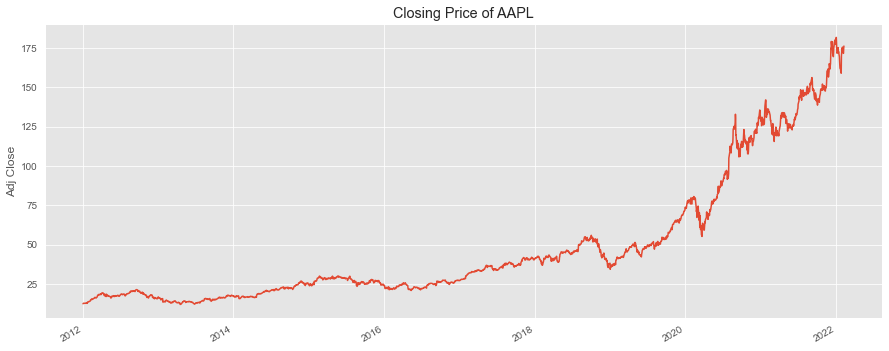

In [21]:
sns.set_style('darkgrid')
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {symbol}")
plt.show()
# plt.tight_layout()

### Data Reader

In [46]:
from pandas_datareader.data import DataReader
from datetime import datetime
# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())



In [47]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575915
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783869
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897020
...,...,...,...,...,...,...
2022-02-03,176.240005,172.119995,174.479996,172.899994,89418100.0,172.679993
2022-02-04,174.100006,170.679993,171.679993,172.389999,82391400.0,172.389999
2022-02-07,173.949997,170.949997,172.860001,171.660004,77251200.0,171.660004


In [48]:
features = ['Open', 'High', 'Low', 'Volume']

In [49]:
y = df.filter(['Adj Close']).values
y

array([[ 12.57591534],
       [ 12.64349937],
       [ 12.78386879],
       ...,
       [171.66000366],
       [174.83000183],
       [176.27999878]])

In [50]:
y.shape

(2544, 1)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
#Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])
# X= pd.DataFrame(columns=features, data=X_scaled, index=df.index)
X

array([[0.00453481, 0.00273148, 0.00516171, 0.17829311],
       [0.00466177, 0.00319307, 0.00522217, 0.14949083],
       [0.00570924, 0.00401251, 0.00595431, 0.15716774],
       ...,
       [0.94211189, 0.94670017, 0.95059458, 0.02474282],
       [0.93541651, 0.95500053, 0.9534972 , 0.02308971],
       [0.96101293, 0.96270788, 0.97448091, 0.0199271 ]])

In [53]:
from sklearn.model_selection import TimeSeriesSplit

In [54]:
tscv = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    

In [55]:
X_train.shape

(2313, 4)

In [56]:
X_test.shape

(231, 4)

In [57]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [58]:
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [59]:
model = Sequential()
model.add(LSTM(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [60]:
model.fit(X_train, y_train, epochs=100, batch_size=8)


Epoch 1/100
290/290 [==============================] - 1s 466us/step - loss: 2198.6392
Epoch 2/100
290/290 [==============================] - 0s 435us/step - loss: 1668.7194
Epoch 3/100
290/290 [==============================] - 0s 434us/step - loss: 828.3694
Epoch 4/100
290/290 [==============================] - 0s 456us/step - loss: 321.8614
Epoch 5/100
290/290 [==============================] - 0s 450us/step - loss: 150.4497
Epoch 6/100
290/290 [==============================] - 0s 440us/step - loss: 69.2776
Epoch 7/100
290/290 [==============================] - 0s 432us/step - loss: 24.4421
Epoch 8/100
290/290 [==============================] - 0s 446us/step - loss: 6.3815
Epoch 9/100
290/290 [==============================] - 0s 446us/step - loss: 1.7638
Epoch 10/100
290/290 [==============================] - 0s 436us/step - loss: 0.9475
Epoch 11/100
290/290 [==============================] - 0s 441us/step - loss: 0.7922
Epoch 12/100
290/290 [==============================] - 0s 4

In [61]:
y_pred= model.predict(X_test)


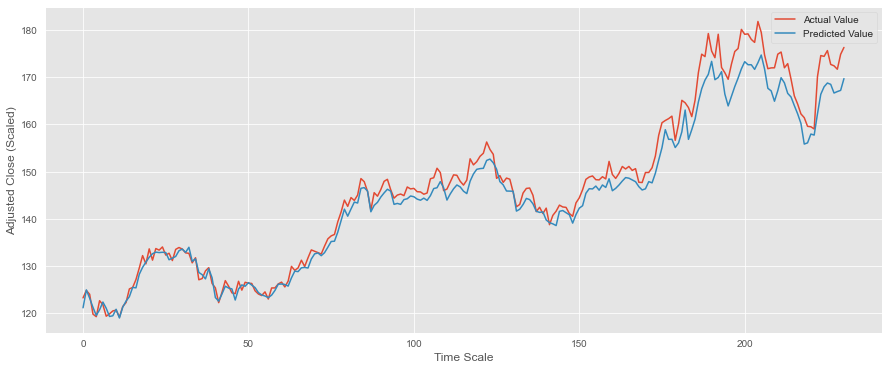

In [62]:
Web Scraping for Machine Learningplt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Value')
plt.plot(y_pred, label='Predicted Value')
plt.ylabel('Adjusted Close (Scaled)')
plt.xlabel('Time Scale')
plt.legend()
plt.show()
